In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits

## Zad.

Narysuj dane MNIST wybierając dwie pierwsze współrzędne
 * t-SNE
 * PCA

In [2]:
digits = load_digits()
# print(digits.DESCR)

print("digits.keys() =", digits.keys())
print("digits.images.shape =", digits.images.shape)
print("digits.data.shape =", digits.data.shape)
print("digits.target.shape =", digits.target.shape)

digits.keys() = dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits.images.shape = (1797, 8, 8)
digits.data.shape = (1797, 64)
digits.target.shape = (1797,)


In [3]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [4]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

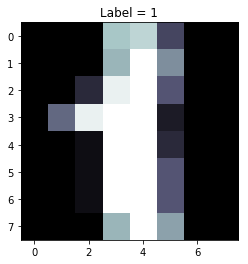

In [5]:
plt.imshow(digits.images[1], cmap=plt.cm.bone)
plt.title("Label = "+str(digits.target[1]))
plt.show()

## Zad.

Wykonaj algorytm k-means na danych MNIST

  * z grupami $k=1,\ldots,20$ 
  * redukcją wymiarowości do $k=5, 20, 64$

i narysuj wykres zależności miar

```python
metrics.adjusted_rand_score
silhouette_score
```

oras SSE

od ilośi klastrów.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [7]:
X = digits.data
y = digits.target

SSE_array = [None, None]
adjusted_rand_score_array = [None, None]
silhouette_score_array = [None, None]

SSE_array_5 = [None, None]
adjusted_rand_score_array_5 = [None, None]
silhouette_score_array_5 = [None, None]

SSE_array_10 = [None, None]
adjusted_rand_score_array_10 = [None, None]
silhouette_score_array_10 = [None, None]


for i in range(2,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    
    SSE_array.append(km.inertia_)
    adjusted_rand_score_array.append(metrics.adjusted_rand_score(y, y_km))
    silhouette_score_array.append( metrics.silhouette_score(X, km.labels_) )
    
    km_pca = make_pipeline(PCA(n_components=5), KMeans(n_clusters=i, n_init=10))
    y_km_pca = km_pca.fit_predict(X)
    SSE_array_5.append(km_pca.named_steps['kmeans'].inertia_)
    adjusted_rand_score_array_5.append(metrics.adjusted_rand_score(y, y_km_pca))
    silhouette_score_array_5.append( metrics.silhouette_score(X,  y_km_pca) )
    
    km_pca = make_pipeline(PCA(n_components=10), KMeans(n_clusters=i, n_init=10))
    y_km_pca = km_pca.fit_predict(X)
    SSE_array_10.append(km_pca.named_steps['kmeans'].inertia_)
    adjusted_rand_score_array_10.append(metrics.adjusted_rand_score(y, y_km_pca))
    silhouette_score_array_10.append( metrics.silhouette_score(X,  y_km_pca) )


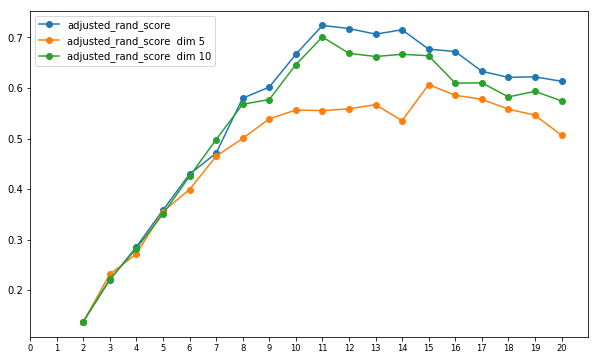

In [8]:
t=range(0,21)
plt.figure(figsize=(10,6));
# plt.plot(SSE_array)
plt.plot( adjusted_rand_score_array, "o-", label="adjusted_rand_score")
plt.plot( adjusted_rand_score_array_5, "o-", label="adjusted_rand_score  dim 5")
plt.plot( adjusted_rand_score_array_10, "o-", label="adjusted_rand_score  dim 10")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

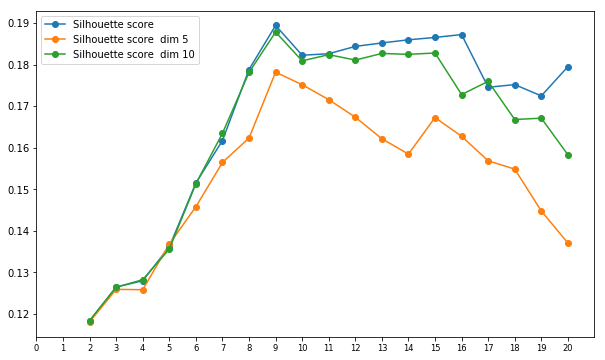

In [9]:
t=range(0,21)
plt.figure(figsize=(10,6));
plt.plot(silhouette_score_array, "o-", label="Silhouette score")
plt.plot(silhouette_score_array_5, "o-", label="Silhouette score  dim 5")
plt.plot(silhouette_score_array_10, "o-", label="Silhouette score  dim 10")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

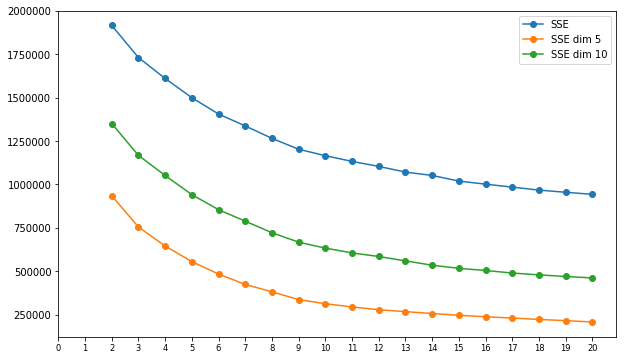

In [12]:
plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.plot(SSE_array_5, "o-", label="SSE dim 5")
plt.plot(SSE_array_10, "o-", label="SSE dim 10")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
wykonaj algorytm dla $k=10$ i policz:
```python
metrics.adjusted_rand_score
silhouette_score
```
oras SSE

w zalezności od redukcji wyniaru za pomocą PCA od 2 do 64

In [60]:
X = digits.data
y = digits.target

SSE_array_pca = [None, None]
adjusted_rand_score_array_pca = [None, None]
silhouette_score_array_pca = [None, None]


for i in range(2,64):
    km_pca = make_pipeline(PCA(n_components=i), KMeans(n_clusters=10, n_init=10))
    y_km_pca = km_pca.fit_predict(X)
    SSE_array_pca.append(km_pca.named_steps['kmeans'].inertia_)
    adjusted_rand_score_array_pca.append(metrics.adjusted_rand_score(y, y_km_pca))
    silhouette_score_array_pca.append( metrics.silhouette_score(X,  y_km_pca) )
    

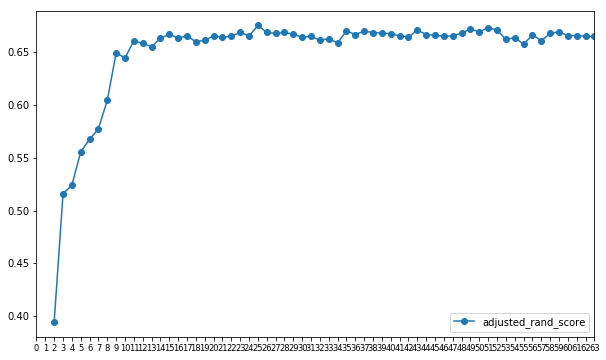

In [61]:
t=range(0,64)
plt.figure(figsize=(10,6));
plt.plot( adjusted_rand_score_array_pca, "o-", label="adjusted_rand_score")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

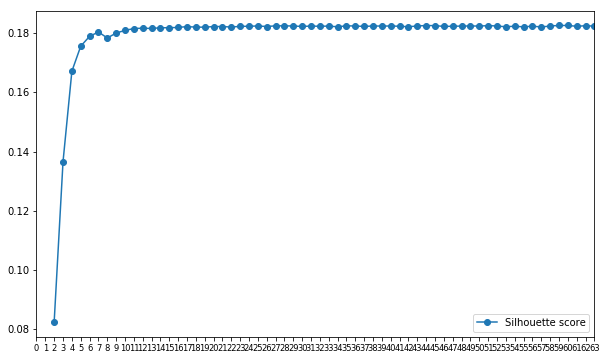

In [65]:
t=range(0,64)
plt.figure(figsize=(10,6));
plt.plot(silhouette_score_array_pca, "o-", label="Silhouette score")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

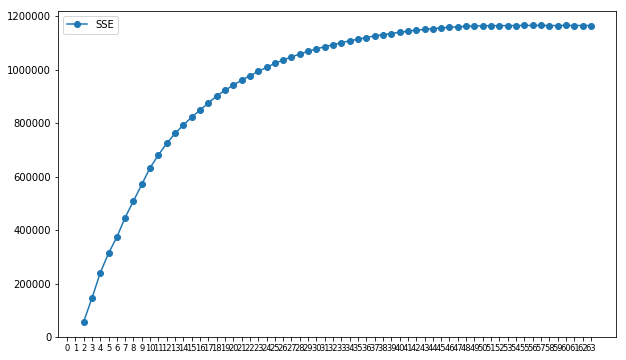

In [66]:
plt.figure(figsize=(10,6));
plt.plot(SSE_array_pca, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad.

Zwizualizuj wyniki grupowania w 2D za pomocą

* t-SNE

dla
* k = 10
oraz t-SNE po PCA z
* d = 5, 20, 64
oraz PCA z 
* d=2

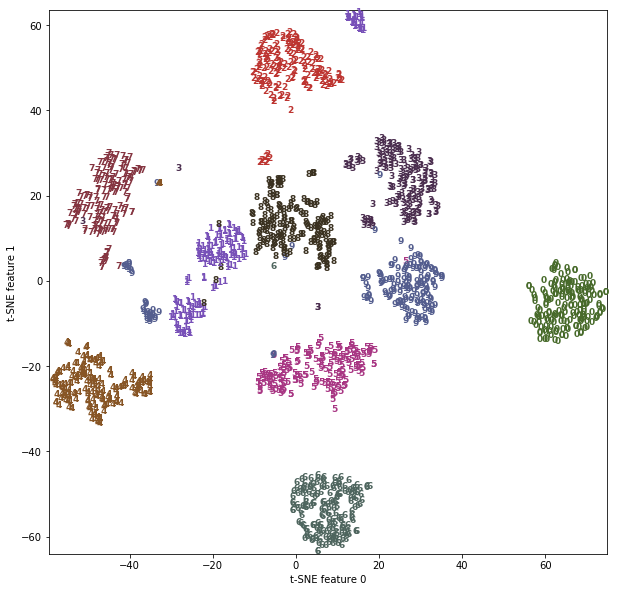

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

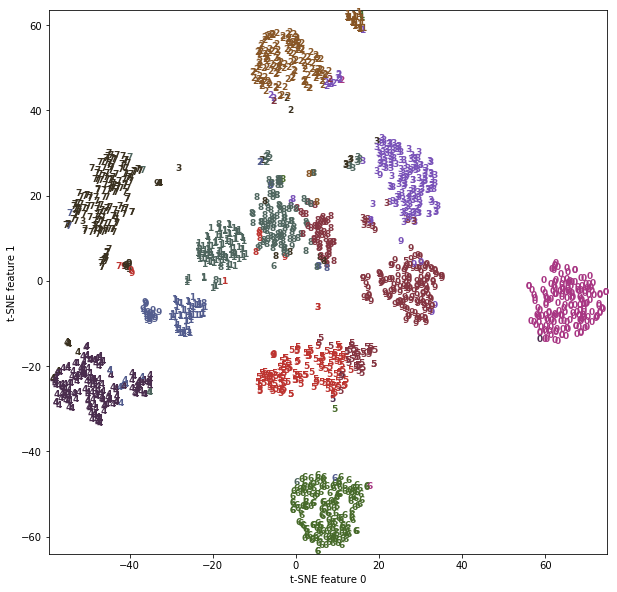

In [54]:
km = KMeans(n_clusters=10, n_init=10)
y_km = km.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y_km[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

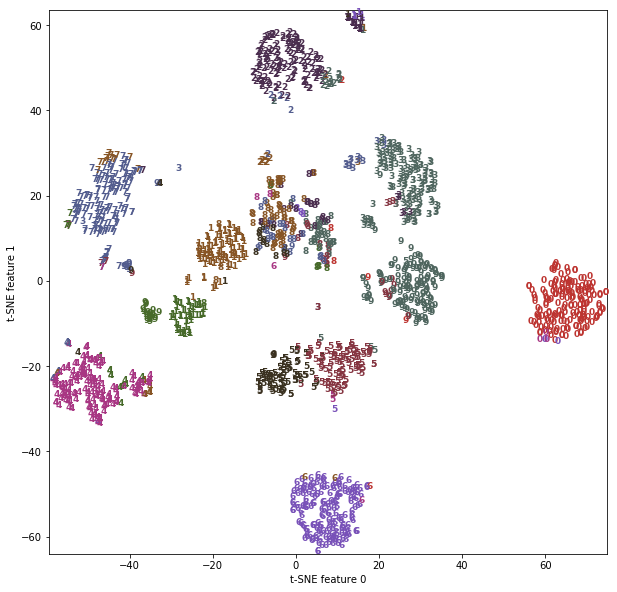

In [55]:
km_pca = make_pipeline(PCA(n_components=5), KMeans(n_clusters=10, n_init=10))
y_km_pca = km_pca.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y_km_pca[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

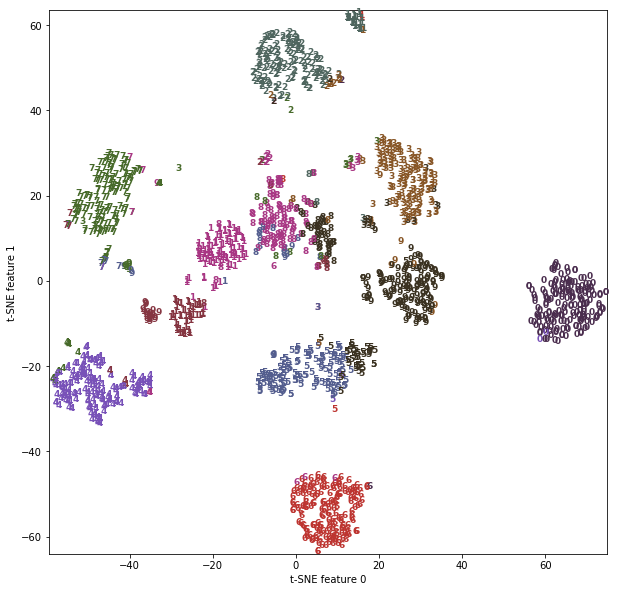

In [58]:
km_pca = make_pipeline(PCA(n_components=10), KMeans(n_clusters=10, n_init=10))
y_km_pca = km_pca.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y_km_pca[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()